<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="30%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://pythonquants.com' target='_blank'>www.pythonquants.com</a>

**Contact us** | <a href='mailto:analytics@pythonquants.com'>analytics@pythonquants.com</a>

# Financial Time Series

In [1]:
import warnings
warnings.simplefilter('ignore')

## pandas Basics

In [2]:
import numpy as np
import pandas as pd

### First Steps with DataFrame Class

In [3]:
df = pd.DataFrame([10, 20, 30, 40], columns=['numbers'],
                  index=['a', 'b', 'c', 'd'])
df

,numbers
a,10
b,20
c,30
d,40


In [4]:
df.index  # the index values

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [5]:
df.columns  # the column names

Index([u'numbers'], dtype='object')

In [6]:
df.ix['c']  # selection via index

numbers    30
Name: c, dtype: int64

In [7]:
df.ix[['a', 'd']]  # selection of multiple indices

,numbers
a,10
d,40


In [8]:
df.ix[df.index[1:3]]  # selection via Index object

,numbers
b,20
c,30


In [9]:
df.sum()  # sum per column

numbers    100
dtype: int64

In [10]:
df.apply(lambda x: x ** 2)  # square of every element

,numbers
a,100
b,400
c,900
d,1600


In [11]:
df ** 2  # again square, this time NumPy-like

,numbers
a,100
b,400
c,900
d,1600


In [12]:
df['floats'] = (1.5, 2.5, 3.5, 4.5)
  # new column is generated
df

,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [13]:
df['floats']  # selection of column

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [14]:
df['names'] = pd.DataFrame(['Yves', 'Guido', 'Felix', 'Francesc'],
                           index=['d', 'a', 'b', 'c'])
df

,numbers,floats,names
a,10,1.5,Guido
b,20,2.5,Felix
c,30,3.5,Francesc
d,40,4.5,Yves


In [15]:
df.append({'numbers': 100, 'floats': 5.75, 'names': 'Henry'},
               ignore_index=True)
  # temporary object; df not changed

,numbers,floats,names
0,10,1.50,Guido
1,20,2.50,Felix
2,30,3.50,Francesc
3,40,4.50,Yves
4,100,5.75,Henry


In [16]:
df = df.append(pd.DataFrame({'numbers': 100, 'floats': 5.75,
                             'names': 'Henry'}, index=['z',]))
df

,floats,names,numbers
a,1.50,Guido,10
b,2.50,Felix,20
c,3.50,Francesc,30
d,4.50,Yves,40
z,5.75,Henry,100


In [17]:
df.join(pd.DataFrame([1, 4, 9, 16, 25],
            index=['a', 'b', 'c', 'd', 'y'],
            columns=['squares',]))
  # temporary object

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
z,5.75,Henry,100,NaN


In [18]:
df = df.join(pd.DataFrame([1, 4, 9, 16, 25],
                    index=['a', 'b', 'c', 'd', 'y'],
                    columns=['squares',]),
                    how='outer')
df

,floats,names,numbers,squares
a,1.50,Guido,10,1
b,2.50,Felix,20,4
c,3.50,Francesc,30,9
d,4.50,Yves,40,16
y,NaN,NaN,NaN,25
z,5.75,Henry,100,NaN


In [19]:
df[['numbers', 'squares']].mean()
  # column-wise mean

numbers    40
squares    11
dtype: float64

In [20]:
df[['numbers', 'squares']].std()
  # column-wise standard deviation

numbers    35.355339
squares     9.669540
dtype: float64

### Second Steps with DataFrame Class

In [21]:
a = np.random.standard_normal((9, 4))
a.round(6)

array([[ 1.395884, -0.211678, -1.496935, -1.599972],
       [ 1.207983, -1.044791,  0.949148,  0.214076],
       [-1.216668,  0.049338,  0.260951, -0.083694],
       [-0.20149 , -1.907368, -0.182761,  2.380596],
       [-0.08032 , -0.146086,  0.494233, -1.842956],
       [-0.12713 , -0.850146, -0.81677 ,  1.02073 ],
       [-0.928652, -0.376429, -0.598408, -1.152673],
       [ 0.95279 ,  0.988867,  0.661644,  1.058102],
       [-1.222361, -0.628496, -1.120179, -0.14629 ]])

In [22]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,1.395884,-0.211678,-1.496935,-1.599972
1,1.207983,-1.044791,0.949148,0.214076
2,-1.216668,0.049338,0.260951,-0.083694
3,-0.201490,-1.907368,-0.182761,2.380596
4,-0.080320,-0.146086,0.494233,-1.842956
5,-0.127130,-0.850146,-0.816770,1.020730
6,-0.928652,-0.376429,-0.598408,-1.152673
7,0.952790,0.988867,0.661644,1.058102
8,-1.222361,-0.628496,-1.120179,-0.146290


In [23]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,1.395884,-0.211678,-1.496935,-1.599972
1,1.207983,-1.044791,0.949148,0.214076
2,-1.216668,0.049338,0.260951,-0.083694
3,-0.201490,-1.907368,-0.182761,2.380596
4,-0.080320,-0.146086,0.494233,-1.842956
5,-0.127130,-0.850146,-0.816770,1.020730
6,-0.928652,-0.376429,-0.598408,-1.152673
7,0.952790,0.988867,0.661644,1.058102
8,-1.222361,-0.628496,-1.120179,-0.146290


In [24]:
df['No2'][3]  # value in column No2 at index position 3

-1.907367859224099

In [25]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30'],
              dtype='datetime64[ns]', freq='M', tz=None)

In [26]:
df.index = dates
df

,No1,No2,No3,No4
2015-01-31,1.395884,-0.211678,-1.496935,-1.599972
2015-02-28,1.207983,-1.044791,0.949148,0.214076
2015-03-31,-1.216668,0.049338,0.260951,-0.083694
2015-04-30,-0.201490,-1.907368,-0.182761,2.380596
2015-05-31,-0.080320,-0.146086,0.494233,-1.842956
2015-06-30,-0.127130,-0.850146,-0.816770,1.020730
2015-07-31,-0.928652,-0.376429,-0.598408,-1.152673
2015-08-31,0.952790,0.988867,0.661644,1.058102
2015-09-30,-1.222361,-0.628496,-1.120179,-0.146290


In [27]:
np.array(df).round(6)

array([[ 1.395884, -0.211678, -1.496935, -1.599972],
       [ 1.207983, -1.044791,  0.949148,  0.214076],
       [-1.216668,  0.049338,  0.260951, -0.083694],
       [-0.20149 , -1.907368, -0.182761,  2.380596],
       [-0.08032 , -0.146086,  0.494233, -1.842956],
       [-0.12713 , -0.850146, -0.81677 ,  1.02073 ],
       [-0.928652, -0.376429, -0.598408, -1.152673],
       [ 0.95279 ,  0.988867,  0.661644,  1.058102],
       [-1.222361, -0.628496, -1.120179, -0.14629 ]])

### Basic Analytics

In [28]:
df.sum()

No1   -0.219963
No2   -4.126790
No3   -1.849076
No4   -0.152081
dtype: float64

In [29]:
df.mean()

No1   -0.024440
No2   -0.458532
No3   -0.205453
No4   -0.016898
dtype: float64

In [30]:
df.cumsum()

,No1,No2,No3,No4
2015-01-31,1.395884,-0.211678,-1.496935,-1.599972
2015-02-28,2.603867,-1.256469,-0.547787,-1.385896
2015-03-31,1.387199,-1.207132,-0.286836,-1.469590
2015-04-30,1.185709,-3.114499,-0.469597,0.911006
2015-05-31,1.105389,-3.260586,0.024636,-0.931950
2015-06-30,0.978260,-4.110732,-0.792134,0.088780
2015-07-31,0.049608,-4.487161,-1.390541,-1.063893
2015-08-31,1.002398,-3.498294,-0.728897,-0.005791
2015-09-30,-0.219963,-4.126790,-1.849076,-0.152081


In [31]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.024440,-0.458532,-0.205453,-0.016898
std,1.013052,0.801816,0.853327,1.377744
min,-1.222361,-1.907368,-1.496935,-1.842956
25%,-0.928652,-0.850146,-0.816770,-1.152673
50%,-0.127130,-0.376429,-0.182761,-0.083694
75%,0.952790,-0.146086,0.494233,1.020730
max,1.395884,0.988867,0.949148,2.380596


In [32]:
np.sqrt(df)

,No1,No2,No3,No4
2015-01-31,1.181475,NaN,NaN,NaN
2015-02-28,1.099083,NaN,0.974242,0.462683
2015-03-31,NaN,0.222121,0.510833,NaN
2015-04-30,NaN,NaN,NaN,1.542918
2015-05-31,NaN,NaN,0.703017,NaN
2015-06-30,NaN,NaN,NaN,1.010312
2015-07-31,NaN,NaN,NaN,NaN
2015-08-31,0.976109,0.994418,0.813415,1.028641
2015-09-30,NaN,NaN,NaN,NaN


In [33]:
np.sqrt(df).sum()

No1    3.256667
No2    1.216539
No3    3.001508
No4    4.044554
dtype: float64

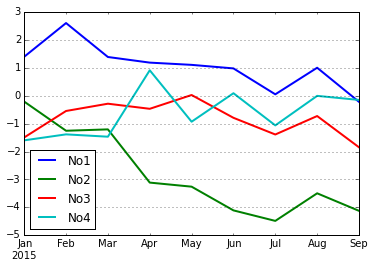

In [34]:
%matplotlib inline
df.cumsum().plot(lw=2.0, grid=True)
# tag: dataframe_plot
# title: Line plot of a DataFrame object

### Series Class

In [35]:
type(df)

pandas.core.frame.DataFrame

In [36]:
df['No1']

2015-01-31    1.395884
2015-02-28    1.207983
2015-03-31   -1.216668
2015-04-30   -0.201490
2015-05-31   -0.080320
2015-06-30   -0.127130
2015-07-31   -0.928652
2015-08-31    0.952790
2015-09-30   -1.222361
Freq: M, Name: No1, dtype: float64

In [37]:
type(df['No1'])

pandas.core.series.Series

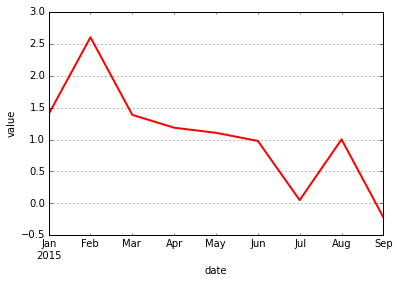

In [38]:
import matplotlib.pyplot as plt
df['No1'].cumsum().plot(style='r', lw=2., grid=True)
plt.xlabel('date')
plt.ylabel('value')
# tag: time_series
# title: Line plot of a Series object

### GroupBy Operations

In [39]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,1.395884,-0.211678,-1.496935,-1.599972,Q1
2015-02-28,1.207983,-1.044791,0.949148,0.214076,Q1
2015-03-31,-1.216668,0.049338,0.260951,-0.083694,Q1
2015-04-30,-0.201490,-1.907368,-0.182761,2.380596,Q2
2015-05-31,-0.080320,-0.146086,0.494233,-1.842956,Q2
2015-06-30,-0.127130,-0.850146,-0.816770,1.020730,Q2
2015-07-31,-0.928652,-0.376429,-0.598408,-1.152673,Q3
2015-08-31,0.952790,0.988867,0.661644,1.058102,Q3
2015-09-30,-1.222361,-0.628496,-1.120179,-0.146290,Q3


In [40]:
groups = df.groupby('Quarter')

In [41]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,0.462400,-0.402377,-0.095612,-0.489863
Q2,-0.136313,-0.967867,-0.168433,0.519457
Q3,-0.399408,-0.005353,-0.352314,-0.080287


In [42]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,1.395884,0.049338,0.949148,0.214076
Q2,-0.080320,-0.146086,0.494233,2.380596
Q3,0.952790,0.988867,0.661644,1.058102


In [43]:
groups.size()

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [44]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                  'Odd', 'Even', 'Odd']

In [45]:
groups = df.groupby(['Quarter', 'Odd_Even'])

In [46]:
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [47]:
groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even      1.207983 -1.044791  0.949148  0.214076
        Odd       0.089608 -0.081170 -0.617992 -0.841833
Q2      Even     -0.164310 -1.378757 -0.499765  1.700663
        Odd      -0.080320 -0.146086  0.494233 -1.842956
Q3      Even      0.952790  0.988867  0.661644  1.058102
        Odd      -1.075506 -0.502462 -0.859293 -0.649482

## Financial Data

In [48]:
import pandas.io.data as web

In [49]:
DAX = web.DataReader(name='^GDAXI', data_source='yahoo',
                     start='2000-1-1')
DAX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3975 entries, 2000-01-03 to 2015-08-07
Data columns (total 6 columns):
Open         3975 non-null float64
High         3975 non-null float64
Low          3975 non-null float64
Close        3975 non-null float64
Volume       3975 non-null int64
Adj Close    3975 non-null float64
dtypes: float64(5), int64(1)
memory usage: 217.4 KB


In [50]:
DAX.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-08-03,11295.500000,11460.400391,11248.269531,11443.719727,77981000,11443.719727
2015-08-04,11408.230469,11476.900391,11380.809570,11456.070312,66699900,11456.070312
2015-08-05,11503.209961,11655.740234,11497.919922,11636.299805,73800000,11636.299805
2015-08-06,11605.589844,11669.860352,11574.969727,11585.099609,67470900,11585.099609
2015-08-07,11561.370117,11582.900391,11484.849609,11490.830078,60211600,11490.830078


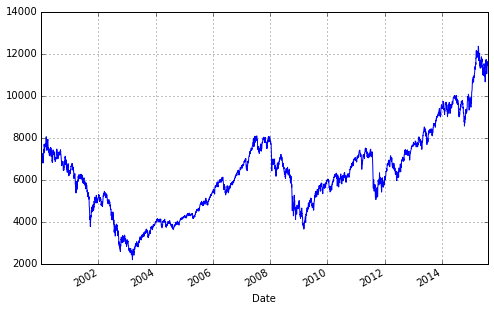

In [51]:
DAX['Close'].plot(figsize=(8, 5), grid=True)
# tag: dax
# title: Historical DAX index levels

In [52]:
%time DAX['Return'] = np.log(DAX['Close'] / DAX['Close'].shift(1))

CPU times: user 27 ms, sys: 0 ns, total: 27 ms
Wall time: 26.6 ms


In [53]:
DAX[['Close', 'Return', 'Return']].tail()

,Close,Return,Return
Date,,,
2015-08-03,11443.719727,0.011843,0.011843
2015-08-04,11456.070312,0.001079,0.001079
2015-08-05,11636.299805,0.015610,0.015610
2015-08-06,11585.099609,-0.004410,-0.004410
2015-08-07,11490.830078,-0.008170,-0.008170


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45db498210>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45db382190>], dtype=object)

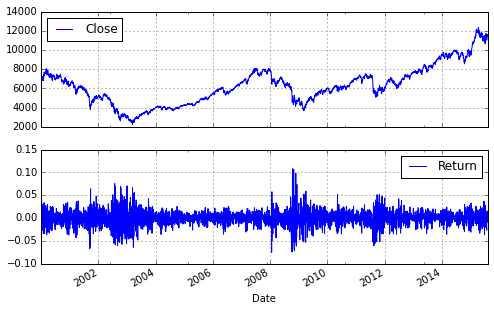

In [54]:
DAX[['Close', 'Return']].plot(subplots=True, style='b',
                              figsize=(8, 5), grid=True)
# tag: dax_returns
# title: The DAX index and daily log returns

In [55]:
DAX['42d'] = pd.rolling_mean(DAX['Close'], window=42)
DAX['252d'] = pd.rolling_mean(DAX['Close'], window=252)

In [56]:
DAX[['Close', '42d', '252d']].tail()

,Close,42d,252d
Date,,,
2015-08-03,11443.719727,11255.769485,10515.471021
2015-08-04,11456.070312,11261.934245,10524.383681
2015-08-05,11636.299805,11275.538528,10534.233522
2015-08-06,11585.099609,11289.438756,10543.738917
2015-08-07,11490.830078,11294.806385,10553.107131


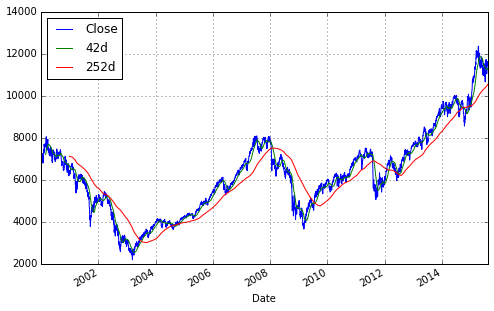

In [57]:
DAX[['Close', '42d', '252d']].plot(figsize=(8, 5), grid=True)
# tag: dax_trends
# title: The DAX index and moving averages

In [58]:
import math
DAX['Mov_Vol'] = pd.rolling_std(DAX['Return'],
                                window=252) * math.sqrt(252)
  # moving annual volatility

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45db1e86d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45db075110>], dtype=object)

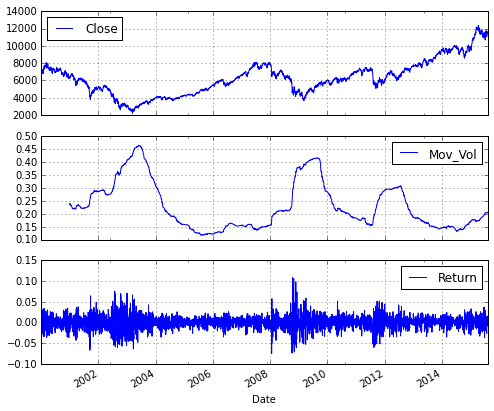

In [59]:
DAX[['Close', 'Mov_Vol', 'Return']].plot(subplots=True, style='b',
                                         figsize=(8, 7), grid=True)
# tag: dax_mov_std
# title: The DAX index and moving, annualized volatility

## Regression Analysis

In [60]:
import pandas as pd
from urllib import urlretrieve

In [61]:
es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')
!ls -o ./data/*.txt
# Windows: use dir

-rw-r--r-- 1 trial_yves 661200 Aug  8 11:37 ./data/es.txt
-rw-r--r-- 1 trial_yves 352571 Aug  8 11:37 ./data/vs.txt


In [62]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]

In [63]:
lines[:6]

['PriceIndices-EUROCurrency\n',
 'Date;Blue-Chip;Blue-Chip;Broad;Broad;ExUK;ExEuroZone;Blue-Chip;Broad\n',
 ';Europe;Euro-Zone;Europe;Euro-Zone;;;Nordic;Nordic\n',
 ';SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n']

In [64]:
for line in lines[3883:3890]:
    print line[41:],

317.10;267.23;5268.36;363.19
322.55;272.18;5360.52;370.94
322.69;272.95;5360.52;370.94
327.57;277.68;5479.59;378.69;
329.94;278.87;5585.35;386.99;
326.77;272.38;5522.25;380.09;
332.62;277.08;5722.57;396.12;


In [65]:
new_file = open('./data/es50.txt', 'w')
    # opens a new file
new_file.writelines('date' + lines[3][:-1]
                    + ';DEL' + lines[3][-1])
    # writes the corrected third line of the orginal file
    # as first line of new file
new_file.writelines(lines[4:])
    # writes the remaining lines of the orginial file
new_file.close()

In [66]:
new_lines = open('./data/es50.txt', 'r').readlines()
new_lines[:5]

['date;SX5P;SX5E;SXXP;SXXE;SXXF;SXXA;DK5F;DKXF;DEL\n',
 '31.12.1986;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '01.01.1987;775.00;900.82;82.76;98.58;98.06;69.06;645.26;65.56\n',
 '02.01.1987;770.89;891.78;82.57;97.80;97.43;69.37;647.62;65.81\n',
 '05.01.1987;771.89;898.33;82.82;98.60;98.19;69.16;649.94;65.82\n']

In [67]:
es = pd.read_csv('./data/es50.txt', index_col=0,
                 parse_dates=True, sep=';', dayfirst=True)

In [68]:
np.round(es.tail())

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF,DEL
date,,,,,,,,,
2015-08-03,3456,3635,399,375,470,412,10729,646,NaN
2015-08-04,3449,3619,399,374,468,411,10687,644,NaN
2015-08-05,3501,3677,404,379,473,417,10782,649,NaN
2015-08-06,3472,3668,401,378,471,412,10637,641,NaN
2015-08-07,3441,3638,397,375,466,408,10520,633,NaN


In [69]:
del es['DEL'] 
es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7373 entries, 1986-12-31 to 2015-08-07
Data columns (total 8 columns):
SX5P    7373 non-null float64
SX5E    7373 non-null float64
SXXP    7373 non-null float64
SXXE    7373 non-null float64
SXXF    7373 non-null float64
SXXA    7373 non-null float64
DK5F    7373 non-null float64
DKXF    7373 non-null float64
dtypes: float64(8)
memory usage: 518.4 KB


In [70]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [71]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2015-08-03,3456.29,3635.40,399.44,374.80,469.70,411.85,10728.61,646.17
2015-08-04,3448.82,3619.31,398.75,373.94,468.45,411.34,10686.96,644.50
2015-08-05,3501.11,3676.75,403.93,378.75,473.48,416.71,10781.72,649.46
2015-08-06,3471.95,3668.47,400.70,377.67,470.56,411.54,10637.46,640.67
2015-08-07,3441.25,3637.80,397.07,374.54,466.37,407.53,10520.07,633.10


In [72]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2,
                 parse_dates=True, dayfirst=True)
vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4226 entries, 1999-01-04 to 2015-08-07
Data columns (total 9 columns):
V2TX    4226 non-null float64
V6I1    3787 non-null float64
V6I2    4226 non-null float64
V6I3    4169 non-null float64
V6I4    4226 non-null float64
V6I5    4226 non-null float64
V6I6    4210 non-null float64
V6I7    4226 non-null float64
V6I8    4213 non-null float64
dtypes: float64(9)
memory usage: 330.2 KB


In [73]:
import datetime as dt
data = pd.DataFrame({'EUROSTOXX' :
                     es['SX5E'][es.index > dt.datetime(1999, 1, 1)]})
data = data.join(pd.DataFrame({'VSTOXX' :
                     vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]}))

In [74]:
data = data.fillna(method='ffill')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4254 entries, 1999-01-04 to 2015-08-07
Data columns (total 2 columns):
EUROSTOXX    4254 non-null float64
VSTOXX       4254 non-null float64
dtypes: float64(2)
memory usage: 99.7 KB


In [75]:
data.tail()

,EUROSTOXX,VSTOXX
2015-08-03,3635.40,18.5935
2015-08-04,3619.31,18.2536
2015-08-05,3676.75,17.5482
2015-08-06,3668.47,18.2603
2015-08-07,3637.80,18.7066


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45dae75610>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45dac5e610>], dtype=object)

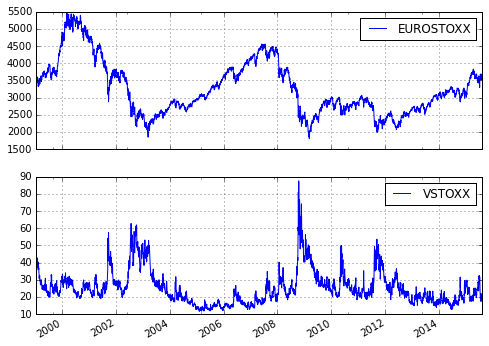

In [76]:
data.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs
# title: The EURO STOXX 50 Index and the VSTOXX volatility index

In [77]:
rets = np.log(data / data.shift(1)) 
rets.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45dab79a10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45dab329d0>], dtype=object)

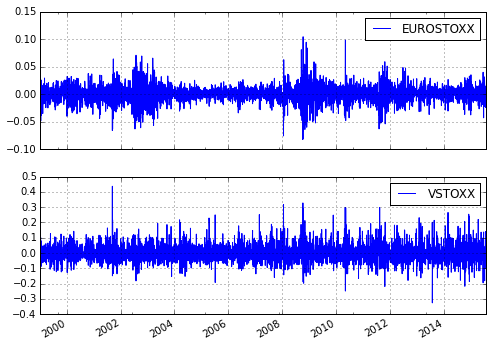

In [78]:
rets.plot(subplots=True, grid=True, style='b', figsize=(8, 6))
# tag: es50_vs_rets
# title: Log returns of EURO STOXX 50 and VSTOXX

In [79]:
xdat = rets['EUROSTOXX']
ydat = rets['VSTOXX']
model = pd.ols(y=ydat, x=xdat)
model


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4253
Number of Degrees of Freedom:   2

R-squared:         0.5335
Adj R-squared:     0.5334

Rmse:              0.0394

F-stat (1, 4251):  4861.3892, p-value:     0.0000

Degrees of Freedom: model 1, resid 4251

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8064     0.0403     -69.72     0.0000    -2.8853    -2.7276
     intercept     0.0000     0.0006       0.04     0.9685    -0.0012     0.0012
---------------------------------End of Summary---------------------------------

In [80]:
model.beta

x           -2.806444
intercept    0.000024
dtype: float64

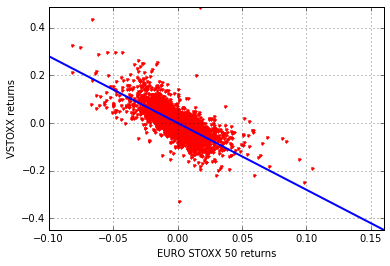

In [81]:
plt.plot(xdat, ydat, 'r.')
ax = plt.axis()  # grab axis values
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=2)
plt.grid(True)
plt.axis('tight')
plt.xlabel('EURO STOXX 50 returns')
plt.ylabel('VSTOXX returns')
# tag: scatter_rets
# title: Scatter plot of log returns and regression line

In [82]:
rets.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.730406
VSTOXX,-0.730406,1.000000


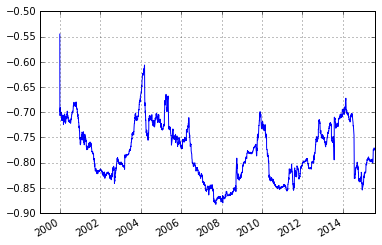

In [83]:
pd.rolling_corr(rets['EUROSTOXX'], rets['VSTOXX'],
                window=252).plot(grid=True, style='b')
# tag: roll_corr
# title: Rolling correlation between EURO STOXX 50 and VSTOXX

## High Frequency Data

In [84]:
import numpy as np
import pandas as pd
import datetime as dt
from urllib import urlretrieve
%matplotlib inline

In [85]:
url1 = 'http://www.netfonds.no/quotes/posdump.php?'
url2 = 'date=%s%s%s&paper=NKE.N&csv_format=csv'
url = url1 + url2

In [86]:
year = '2015'
month = '08'
days = ['03', '04', '05', '06', '07']
  # dates might need to be updated

In [87]:
NKE = pd.DataFrame()
for day in days:
    NKE = NKE.append(pd.read_csv(url % (year, month, day),
                       index_col=0, header=0, parse_dates=True))
NKE.columns = ['bid', 'bdepth', 'bdeptht', 'offer', 'odepth', 'odeptht']
  # shorter colummn names

In [88]:
NKE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50962 entries, 2015-08-03 10:00:01 to 2015-08-07 22:00:00
Data columns (total 6 columns):
bid        50962 non-null float64
bdepth     50962 non-null int64
bdeptht    50962 non-null int64
offer      50962 non-null float64
odepth     50962 non-null int64
odeptht    50962 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.7 MB


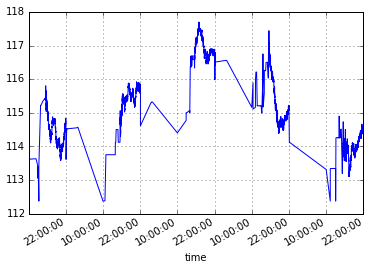

In [89]:
NKE['bid'].plot(grid=True)
# tag: aapl
# title: Nike stock tick data for a week

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45cf36ad10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f45cebced50>], dtype=object)

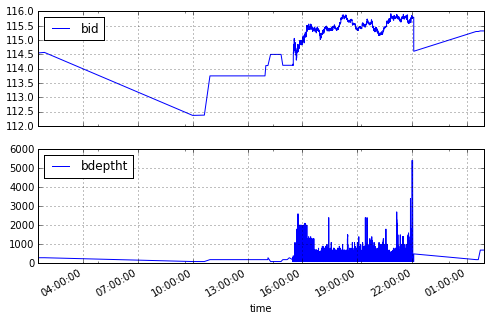

In [90]:
to_plot = NKE[['bid', 'bdeptht']][
    (NKE.index > dt.datetime(2015, 8, 4, 0, 0))
 &  (NKE.index < dt.datetime(2015, 8, 5, 2, 59))]
  # adjust dates to given data set
to_plot.plot(subplots=True, style='b', figsize=(8, 5), grid=True)
# tag: aapl_day
# title: Apple stock tick data and volume for a trading day

In [91]:
NKE_resam = NKE.resample(rule='5min', how='mean')
np.round(NKE_resam.head(), 2)

,bid,bdepth,bdeptht,offer,odepth,odeptht
time,,,,,,
2015-08-03 10:00:00,113.56,100,100,116.82,100,100
2015-08-03 10:05:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:10:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-03 10:20:00,NaN,NaN,NaN,NaN,NaN,NaN


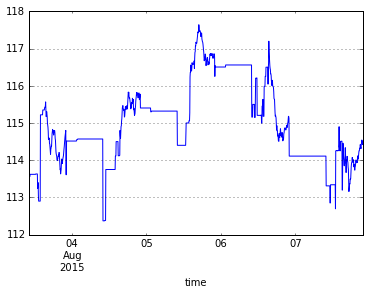

In [92]:
NKE_resam['bid'].fillna(method='ffill').plot(grid=True)
# tag: aapl_resam
# title: Resampled Apple stock tick data

In [93]:
def reversal(x):
    return 2 * 95 - x

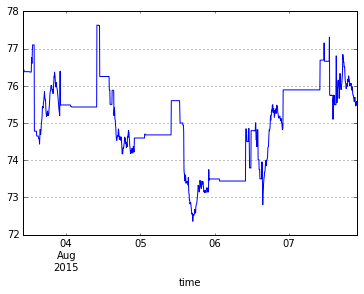

In [94]:
NKE_resam['bid'].fillna(method='ffill').apply(reversal).plot(grid=True)
# tag: aapl_resam_apply
# title: Resampled Apple stock tick data with function applied to it

In [95]:
!rm ./data/*
  # Windows: del /data/*

## Conclusions

## Further Reading

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://www.pythonquants.com" target="_blank">www.pythonquants.com</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a>

<a href="mailto:analytics@pythonquants.com">analytics@pythonquants.com</a>

**Python Quant Platform** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**Derivatives Analytics with Python** |
<a href="http://www.derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Python for Finance** |
<a href="http://shop.oreilly.com/product/0636920032441.do" target="_blank">Python for Finance @ O'Reilly</a>